# RELEVANCE OF THE CHOOSEN DATASET

# FINANCE_DATA DATASET
Relevance of the Dataset to the Two-Pot System Objectives
Demographic Insights:

Age: The age column provide insights into the financial behavior of employees. Younger employees might have different saving and investment preferences compared to older employees. Analyzing age helps determine which age groups are more likely to withdraw from the pot based on their financial maturity or short-term needs.
Investment Avenues:

The dataset includes various investment avenues (e.g., Mutual Funds, Equity Market, Government Bonds, etc.). Understanding the investment preferences of employees can highlight their risk tolerance and liquidity needs. For instance, employees who heavily invest in less liquid assets (like bonds) may be less likely to withdraw compared to those invested in more liquid assets (like equities).
Financial Behavior:

The dataset captures the frequency of investment monitoring (Invest_Monitor) and savings objectives (e.g., retirement plan, healthcare). Employees with a consistent monitoring strategy may have a better grasp of their finances and be less likely to withdraw prematurely. Similarly, those saving for specific objectives might prioritize maintaining their investments to achieve their goals.
Reasons for Investment Choices:

Understanding the reasons behind employees' investment choices (e.g., seeking capital appreciation, fixed returns) can help predict their behavior concerning withdrawals. For instance, those seeking capital appreciation may be more inclined to stay invested longer, while those prioritizing fixed returns might withdraw to secure their investments.
Duration of Investments:

The duration of investments can indicate how long employees plan to stay invested. Employees with longer investment horizons may be less likely to withdraw from the pot compared to those with shorter durations, indicating a more immediate need for liquidity.
Correlation Analysis:

The correlation matrix helps visualize relationships between different financial behaviors and potential withdrawals. For instance, if there’s a strong negative correlation between fixed deposits and withdrawals, it suggests that employees with higher fixed deposits are less likely to withdraw.

In [69]:
#Importing all the neccessary libraries here
import pandas as pd
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns # For advanced data visualization (heatmaps, pairplots, etc.)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [48]:
#Loading the dataset
df = pd.read_csv('Finance_data.csv')
# inspect its size, columns, and data types.
print("The size of this dataset is: ")
print(df.size)
print("\nThese are the columns included in the dataset: ")
print(df.columns)
print("\nThese are the data types included in the dataset: ")
print(df.dtypes)

# Identify any missing data and handle it using imputation or deletion
print("\nmissing values: ")
print(df.isnull().sum())

print("\nGet an overview of numerical columns: ")
print(df.describe())

The size of this dataset is: 
960

These are the columns included in the dataset: 
Index(['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       'Stock_Marktet', 'Factor', 'Objective', 'Purpose', 'Duration',
       'Invest_Monitor', 'Expect', 'Avenue',
       'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual',
       'Reason_Bonds', 'Reason_FD', 'Source'],
      dtype='object')

These are the data types included in the dataset: 
gender                               object
age                                   int64
Investment_Avenues                   object
Mutual_Funds                          int64
Equity_Market                         int64
Debentures                            int64
Government_Bonds                      int64
Fixed_Deposits                        int64
PPF                                   int64
Gold                                  int64
Stock_Mark

In [49]:
print(df.head())

   gender  age Investment_Avenues  Mutual_Funds  Equity_Market  Debentures  \
0  Female   34                Yes             1              2           5   
1  Female   23                Yes             4              3           2   
2    Male   30                Yes             3              6           4   
3    Male   22                Yes             2              1           3   
4  Female   24                 No             2              1           3   

   Government_Bonds  Fixed_Deposits  PPF  Gold  ...           Duration  \
0                 3               7    6     4  ...          1-3 years   
1                 1               5    6     7  ...  More than 5 years   
2                 2               5    1     7  ...          3-5 years   
3                 7               6    4     5  ...   Less than 1 year   
4                 6               4    5     7  ...   Less than 1 year   

  Invest_Monitor   Expect       Avenue What are your savings objectives?  \
0        M

In [50]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:", numeric_cols)


Numeric columns: Index(['age', 'Mutual_Funds', 'Equity_Market', 'Debentures',
       'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold'],
      dtype='object')


# Data visualization
These visualizations help you to:

Distribution of Age: Visualize the age distribution to understand the demographics of the dataset.

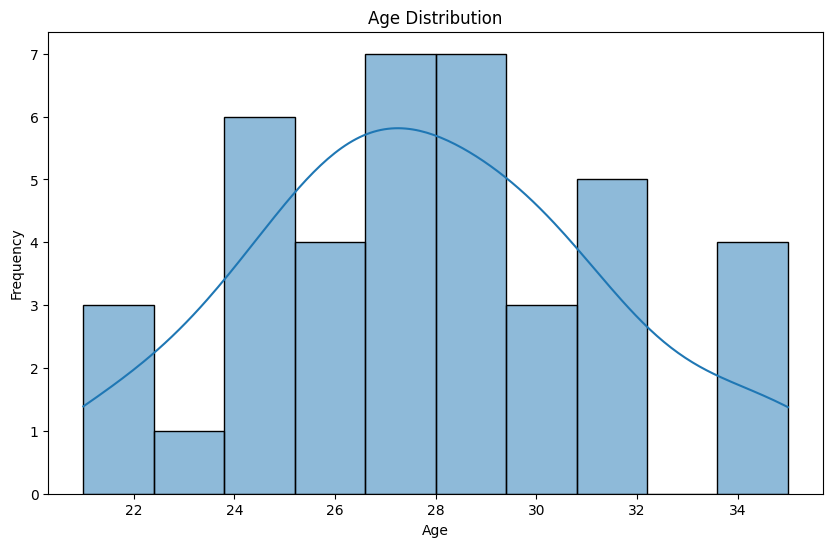

In [51]:
#Create plots to spot patterns and trends

#Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

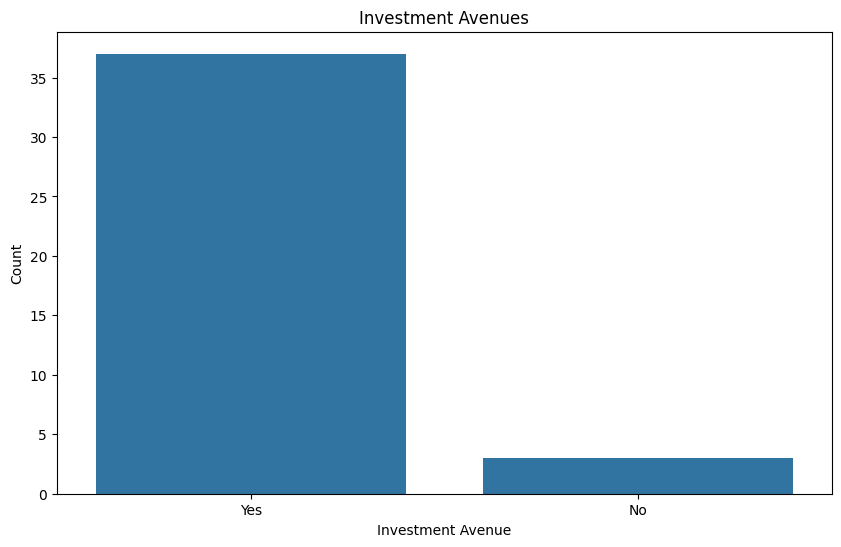

In [52]:
#Investment Avenues: Visualize the distribution of investment avenues to see what employees prefer.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Investment_Avenues')
plt.title('Investment Avenues')
plt.xlabel('Investment Avenue')
plt.ylabel('Count')
plt.show()

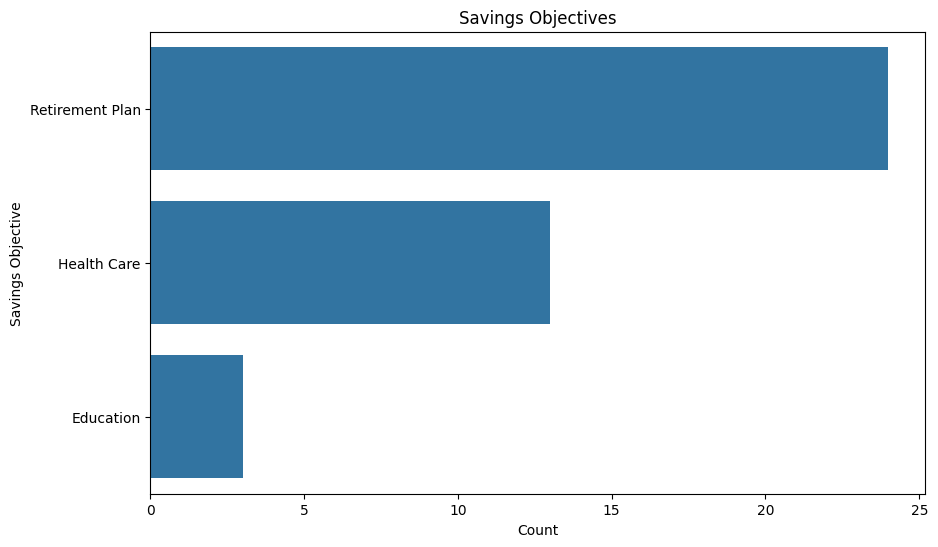

In [53]:
#Savings Objectives: a bar chart to visualize what the main savings objectives are.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='What are your savings objectives?')
plt.title('Savings Objectives')
plt.xlabel('Count')
plt.ylabel('Savings Objective')
plt.show()

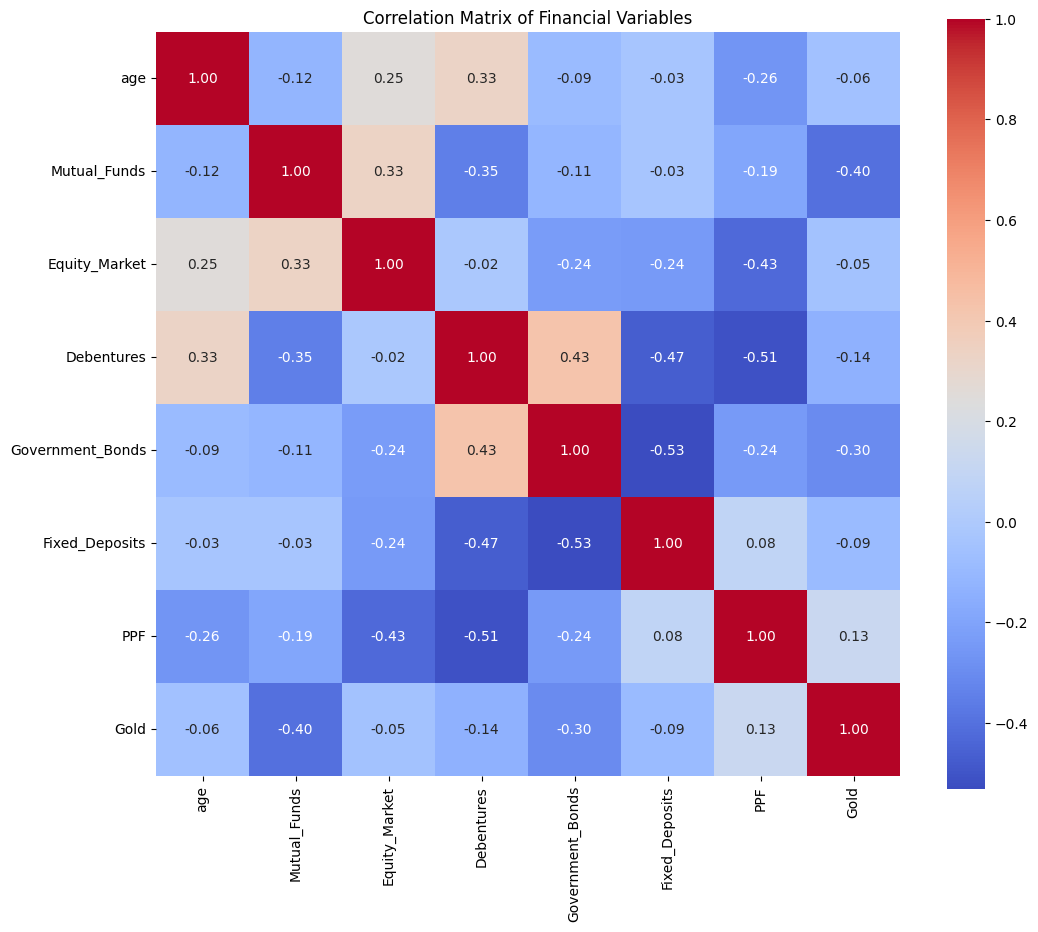

In [54]:
#Analyze Factors Influencing Withdrawals
#Correlation Matrix: To see how different financial behaviors relate to potential withdrawals.

# Calculate the correlation matrix for numeric columns
correlation_matrix = df[['age', 'Mutual_Funds', 'Equity_Market', 'Debentures',
                          'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Financial Variables')
plt.show()

# CLASSIFICATION (PREDICTING WITHDRAWALS)

# RANDOM FOREST
The model identifies that employees with a higher number of government bonds are more likely to withdraw funds.
This insight can guide financial institutions in targeting interventions or offers for employees with lower bond holdings.

Confusion Matrix:
[[5 0]
 [0 3]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



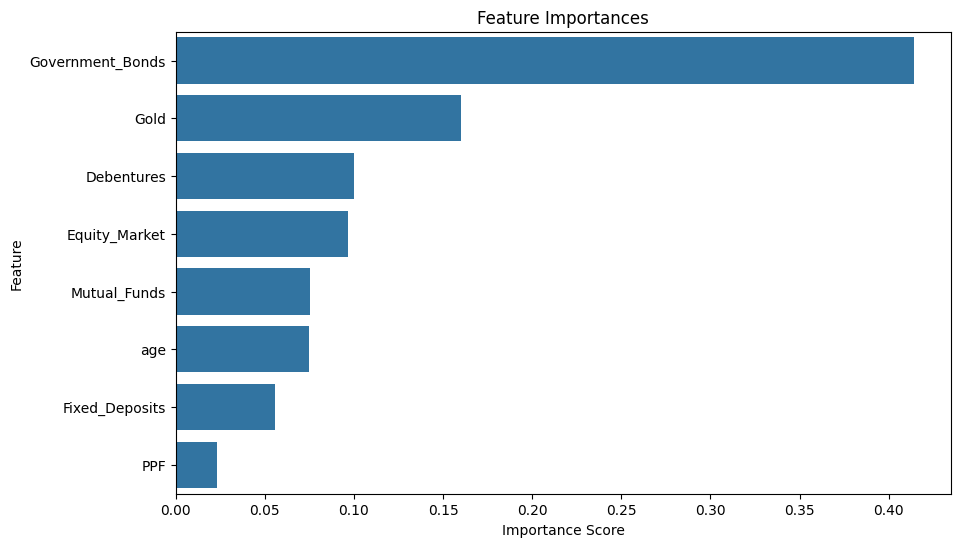

            Feature  Importance
4  Government_Bonds    0.414085
7              Gold    0.159854
3        Debentures    0.100059
2     Equity_Market    0.096444
1      Mutual_Funds    0.075250
0               age    0.075062
5    Fixed_Deposits    0.055777
6               PPF    0.023470


In [55]:
# Step 1: Load the data and define features and target
threshold = 5  
df['withdraw'] = df['Government_Bonds'].apply(lambda x: 1 if x > threshold else 0)

# Using only numeric columns
X = df[['age', 'Mutual_Funds', 'Equity_Market', 'Debentures', 
         'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']]

# Target variable
y = df['withdraw']

#Step 2: Spliting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Step 3: Initializing the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Training the model Evaluating the model
model.fit(X_train, y_train)

#Step 4: Making predictions
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 5: Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Print the feature importances
print(feature_importance_df)

# LOGISTIC REGRESSION


In [57]:
df['withdraw'] = df['Government_Bonds'].apply(lambda x: 1 if x >= 5 else 0)

# Features
X = df[['age', 'Mutual_Funds', 'Equity_Market', 'Debentures', 
         'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']]

# Target variable
y = df['withdraw']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the Logistic Regression model
model = LogisticRegression()

# Training the model with scaled data
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[1 0]
 [0 7]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         7

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



# FORECASTING (LONG-TERM SAVINGS GROWTH)

In [60]:
#Loading our dataset
df = pd.read_csv('Annual_Personal_Income_for_State_of_Iowa.csv')

# Handle missing values and remove outliers.
# Identify any missing data and handle it using imputation or deletion
print("\nmissing values: ")
print(df.isnull().sum())

# Check the columns to find your date column
print("\nAvailable columns: ")
print(df.columns)

print("\nThe first five: ")
print(df.head())


missing values: 
Row ID           0
Table Code       0
Table Name       0
Variable Code    0
Variable         0
Value            0
Variable Unit    0
Date             0
dtype: int64

Available columns: 
Index(['Row ID', 'Table Code', 'Table Name', 'Variable Code', 'Variable',
       'Value', 'Variable Unit', 'Date'],
      dtype='object')

The first five: 
                         Row ID  Table Code               Table Name  \
0  19000_2023_SAINC5N-70_annual  SAINC5N-70               SAINC5N-70   
1    19000_1997_SAINC1-1_annual      SAINC1  Personal Income Summary   
2    19000_2022_SAINC1-1_annual      SAINC1  Personal Income Summary   
3   19000_2022_SAINC4-10_annual   SAINC4-10                SAINC4-10   
4   19000_2000_SAINC4-11_annual   SAINC4-11                SAINC4-11   

  Variable Code                 Variable     Value         Variable Unit  \
0    SAINC5N-70      Proprietors' income  22986853  Thousands of dollars   
1      SAINC1-1          Personal income     69908   Mi

In [62]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Select only the necessary columns for Prophet
df = df[['Date', 'Value']]

# Rename columns to fit Prophet's requirements
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

# Display the first few rows of the prepared dataset
print(df.head())

          ds         y
0 2023-12-31  22986853
1 1997-12-31     69908
2 2022-12-31    192742
3 2022-12-31    192742
4 2000-12-31     77639


C:\Users\user\AppData\Local\Temp\ipykernel_3660\693455969.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)


13:45:58 - cmdstanpy - INFO - Chain [1] start processing
13:45:59 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


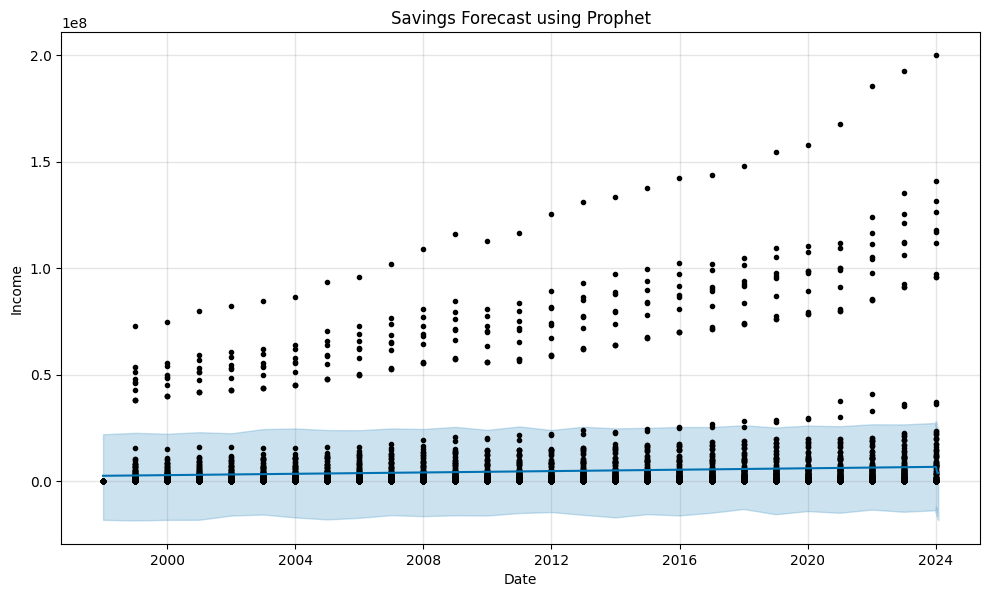

In [66]:
# Initialize the Prophet model
model = Prophet()

# Fit the model
model.fit(df)

# A DataFrame to hold predictions for the next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Savings Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Income')
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series contain

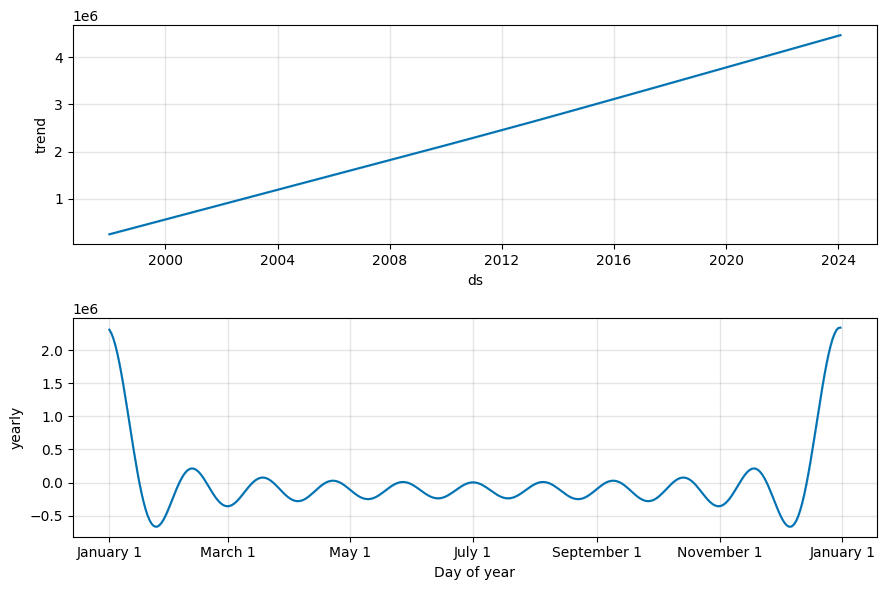

In [67]:
# Plot the seasonal components
fig2 = model.plot_components(forecast)
plt.show()

# ARIMA Model 

o	Implement an ARIMA model to forecast the time series data.
o	Ensure the data is stationary before fitting the model (use differencing or other techniques).
o	Discuss how you selected the ARIMA parameters (p, d, q) and visualize the forecast


In [70]:
#Testung stationarity of the data

def test_stationarity(timeseries):
    # Perform Dickey-Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

# Test for stationarity
test_stationarity(df['y'])

ADF Statistic: -9.878433684684396
p-value: 3.826818644897087e-17
Critical Values:
	1%: -3.4312767147685665
	5%: -2.861949534014055
	10%: -2.566987990923887


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ns will be used.
  self._init_dates(dates, freq)


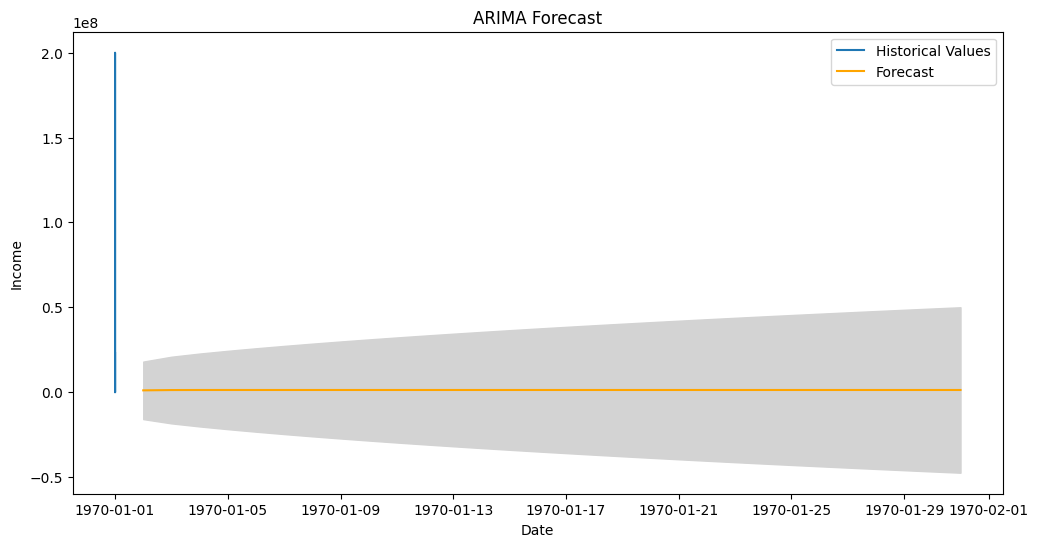

In [71]:
if not pd.api.types.is_datetime64_any_dtype(df.index):
    df.index = pd.to_datetime(df.index) 

model = ARIMA(df['y'], order=(1, 1, 1))  
model_fit= model.fit()

# Forecasting
forecast = model_fit.get_forecast(steps=30)  # Forecasting the next 30 days
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['y'], label='Historical Values')
plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgray')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Income')
plt.legend()
plt.show()

# SENTIMAENT ANALYSIS(EMPLOYEE FEEDBACK)
Categorization of Feedback

I woudl apply the trained sentiment analysis model to categorize the employee feedback into three classes:

Positive: Feedback expressing satisfaction or approval (e.g., "I love the Two-Pot system, it helps me save!").
Negative: Feedback indicating dissatisfaction or criticism (e.g., "The Two-Pot system is confusing and limits my options.").
Neutral: Feedback that is neither positive nor negative (e.g., "The Two-Pot system has both advantages and disadvantages.").

# VISUALIZATION AND REPORTING

Present the categorized feedback data through visualizations such as pie charts or bar graphs to illustrate the distribution of sentiments.
Summarize the findings in a report highlighting key insights, trends, and areas for improvement based on employee feedback.

# CONTINIOUS IMPROVEMENT
Use the insights gained from sentiment analysis to inform decision-making, improve the Two-Pot system, and address employee concerns effectively.
